In [237]:
import pandas as pd
import missingno as msno  

train_data = pd.read_csv('/content/loan-train.csv') 

train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [238]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [239]:

test_data = pd.read_csv('/content/loan-test.csv')

test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [240]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [241]:
def explore_cat_data(df, feat_name):

  if df[feat_name].dtype == 'object':
    print(df[feat_name].value_counts())

In [242]:
explore_cat_data(train_data, 'Gender')

Male      489
Female    112
Name: Gender, dtype: int64


In [243]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

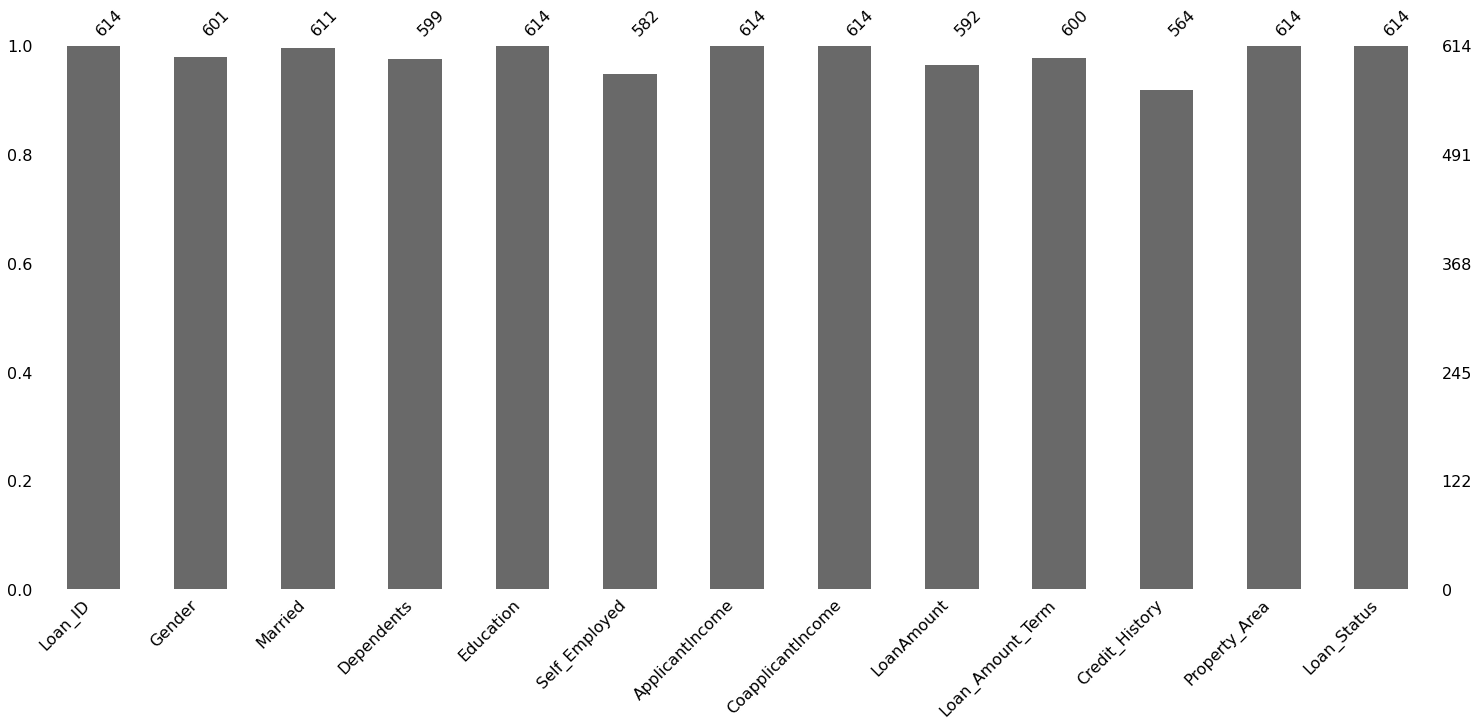

In [244]:
msno.bar(train_data)


In [245]:


train_data['Loan_Status'] = train_data['Loan_Status'].replace({'Y':1, 'N':0})

train_data.Gender = train_data.Gender.replace({'Male':1, 'Female':0})
test_data.Gender = test_data.Gender.replace({'Male':1, 'Female':0})

train_data.Married = train_data.Married.replace({'Yes': 1,  'No':0})
test_data.Married = test_data.Married.replace({'Yes': 1,  'No':0})

train_data.Self_Employed = train_data.Self_Employed.replace({'Yes': 1, 'No':0})
test_data.Self_Employed = test_data.Self_Employed.replace({'Yes': 1, 'No':0})

train_data['Credit_History'].fillna(train_data['Credit_History'].mode(), inplace=True) # Mode
test_data['Credit_History'].fillna(test_data['Credit_History'].mode(), inplace=True) # Mode


In [246]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace = True)
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace = True)

train_data['Married'].fillna(train_data['Married'].mode()[0], inplace = True)
test_data['Married'].fillna(test_data['Married'].mode()[0], inplace = True)

train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace=True)

train_data['Credit_History'].fillna(train_data['Credit_History'].mean(), inplace = True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mean(), inplace = True)

train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(), inplace=True)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

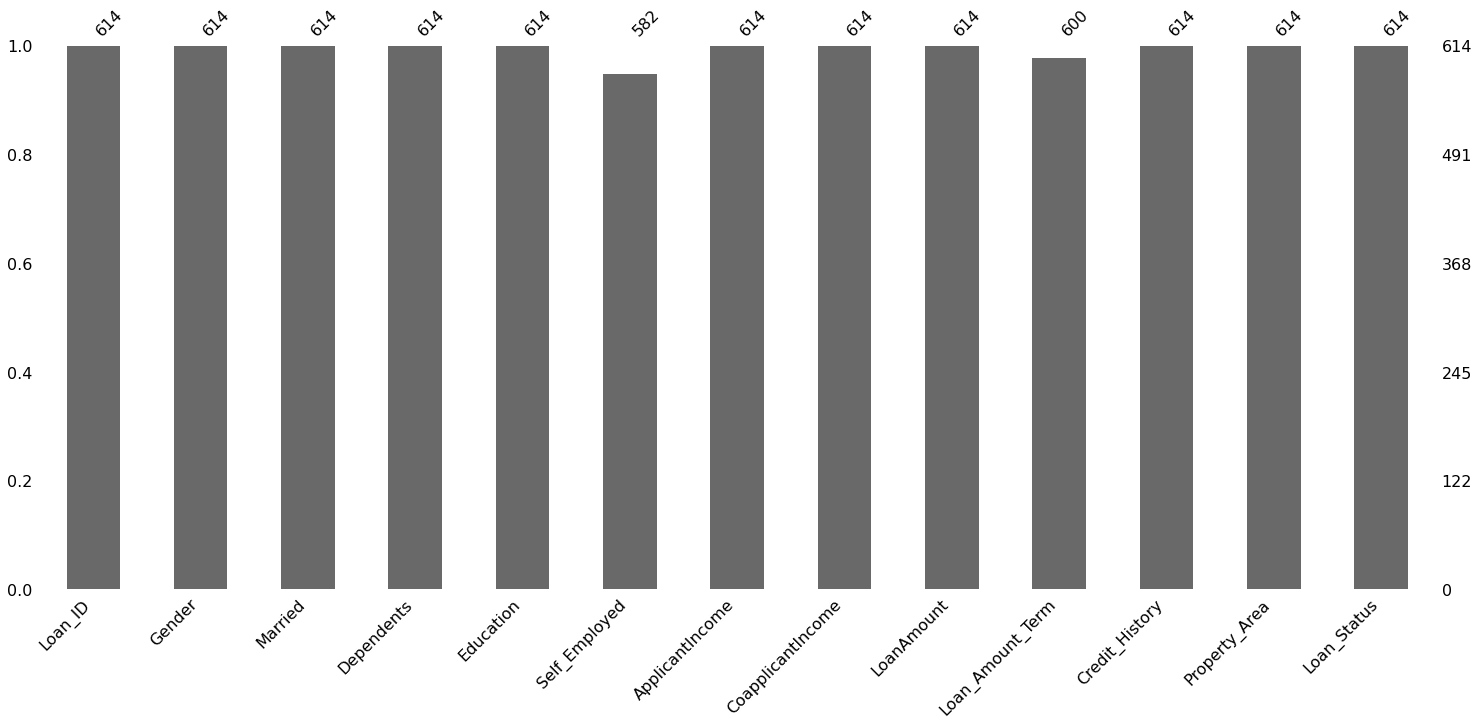

In [247]:
msno.bar(train_data)

train_data.isnull().sum()

In [248]:
train_data.Education = train_data.Education.replace({'Graduate': 1, 'Not Graduate':0})
test_data.Education = test_data.Education.replace({'Graduate':1, 'Not Graduate':0})


In [249]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

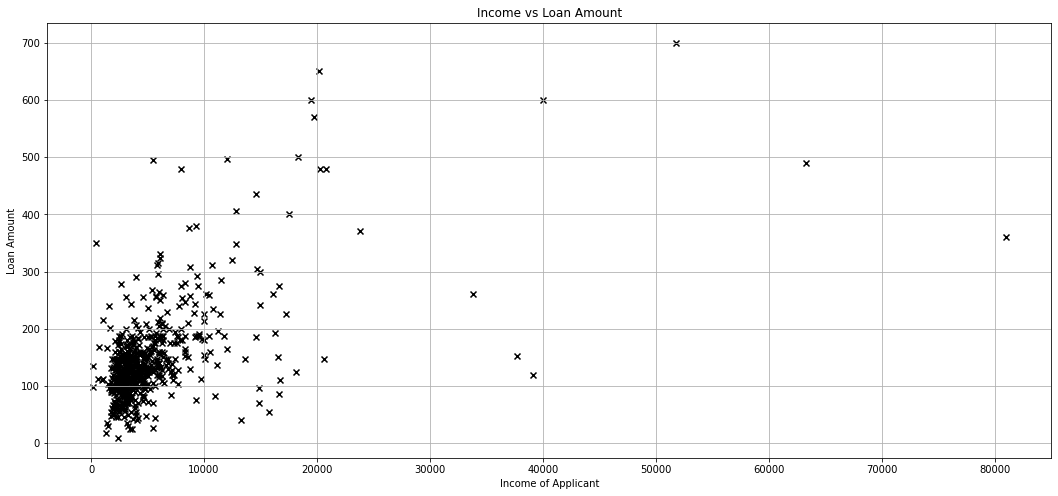

In [250]:
plt.figure(figsize= (18,8))
plt.title('Income vs Loan Amount')

plt.grid()
plt.scatter(train_data['ApplicantIncome'], train_data['LoanAmount'], c='k', marker = 'x')
plt.xlabel('Income of Applicant')
plt.ylabel('Loan Amount')
plt.show()

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
609    0.0
610    0.0
611    0.0
612    0.0
613    1.0
Name: Self_Employed, Length: 614, dtype: float64


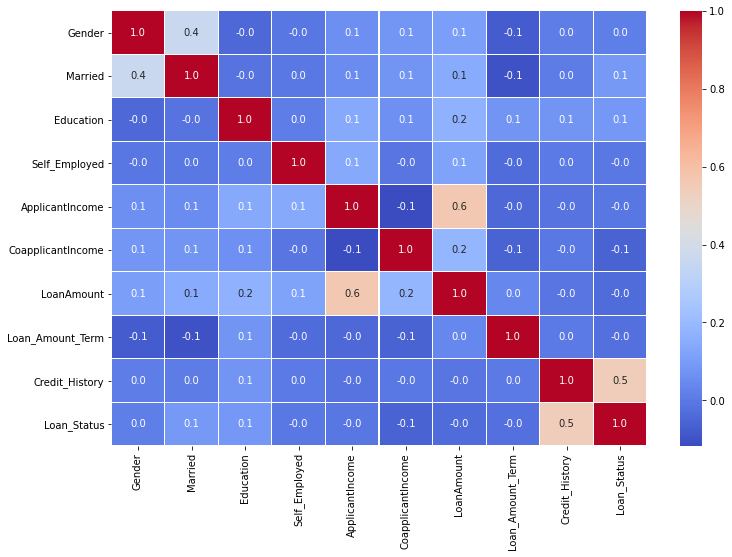

In [251]:
print(train_data['Self_Employed'])

plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [252]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,Rural,1
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.000000,180.0,1.0,Rural,1
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,Urban,1
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,Urban,1


In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_reg = LogisticRegression()

train_data.drop('Loan_ID', inplace=True, axis= 1)
test_data.drop('Loan_ID', inplace=True, axis= 1)

In [254]:
lab_enc = LabelEncoder()

train_data['Property_Area'] = lab_enc.fit_transform(train_data['Property_Area'])
test_data['Property_Area'] = lab_enc.fit_transform(test_data['Property_Area'])



In [255]:
train_data.Dependents = train_data.Dependents.replace({'3+' : '3'})
test_data.Dependents = test_data.Dependents.replace({'3+' : '3'})
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,1.0,1.0,3,1,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,2,1


In [257]:

x_train = train_data.iloc[:, :-1]
x_train


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2
1,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2
3,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2
4,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,0
610,1.0,1.0,3,1,0.0,4106,0.0,40.000000,180.0,1.0,0
611,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,2
612,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,2


In [258]:
y_train = train_data.iloc[:, -1]
y_train

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [259]:
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.000000,2
1,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.000000,2
2,1.0,1,2,1,0.0,5000,1800,208.0,360.0,1.000000,2
3,1.0,1,2,1,0.0,2340,2546,100.0,360.0,0.825444,2
4,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.000000,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3,0,1.0,4009,1777,113.0,360.0,1.000000,2
363,1.0,1,0,1,0.0,4158,709,115.0,360.0,1.000000,2
364,1.0,0,0,1,0.0,3250,1993,126.0,360.0,0.825444,1
365,1.0,1,0,1,0.0,5000,2393,158.0,360.0,1.000000,0


In [260]:
x_train.fillna(x_train.mean(), inplace=True)

logistic_reg.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [263]:
test_data.fillna(test_data.mean(), inplace=True)

predicted = logistic_reg.predict(test_data)

score = logistic_reg.score(x_train, y_train)

print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8110749185667753
accuracy_score percent : 81.11


In [264]:
predict_test = logistic_reg.predict(test_data)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
